In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rberga06.phylab import Datum as d
import math
plt.rcParams["font.family"] = "Latin Modern Roman"
plt.rcParams["mathtext.fontset"] = "cm"

In [2]:
# Load data
files = [(pd.read_csv(f"data/F{i:04}CH1.CSV", header=None), pd.read_csv(f"data/F{i:04}CH2.CSV", header=None)) for i in range(16)]

In [14]:
def find_x_where_y_equals(xs: np.ndarray, ys: np.ndarray, y0: float, start_x: float | None = None, threshold: float = 0.02) -> d[float]:
    indices = np.logical_and(ys >= (y0 - threshold), ys <= (y0 + threshold))
    if start_x is not None:
        indices = np.logical_and(indices, xs >= start_x)
    data = xs[indices]
    data.sort()
    sigma_x = abs(np.diff(data)).min()
    return d(data.mean(), sigma_x * len(data) ** -0.5)


10%: 0.104 ± 0.0023094010767584962 ms
50%: 0.684 ± 0.0019999999999999944 ms
90%: 2.3723333333333336 ± 0.0008164965809276574 ms
Tempo di salita: 2.2683333333333335 ± 0.0031258976576861537 ms
Tempo caratteristico (dal tempo di salita): 1.0323629895326047 ± 0.0014226573332234433 ms
Tempo caratteristico (dal tempo di raddoppiamento): 0.9868034079680511 ± 0.002885390081777919 ms


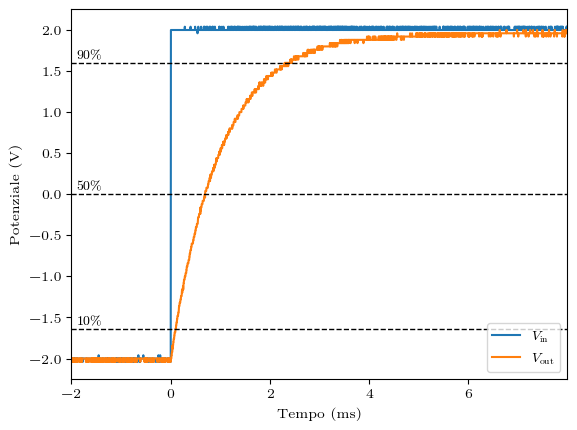

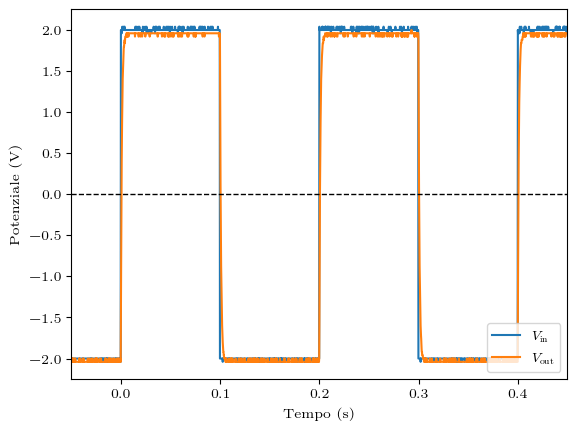

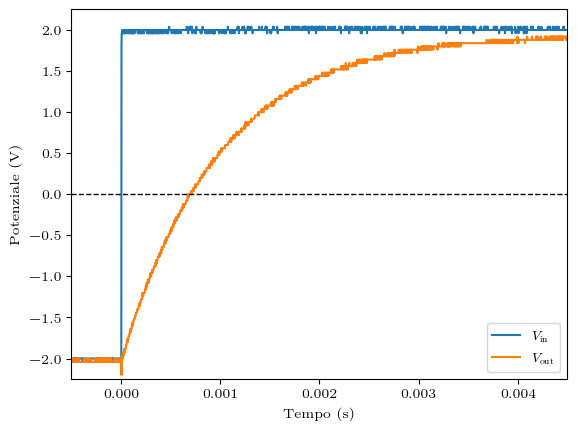

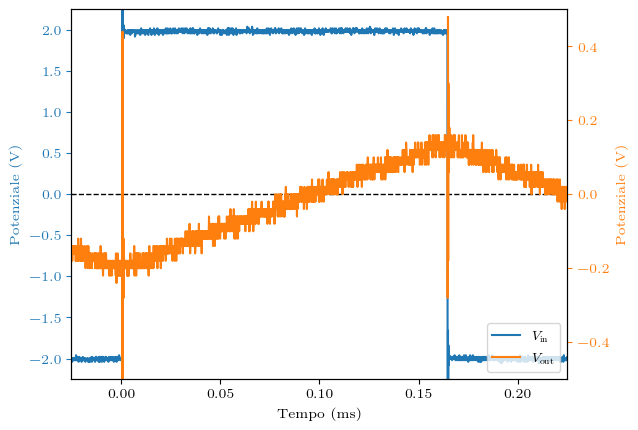

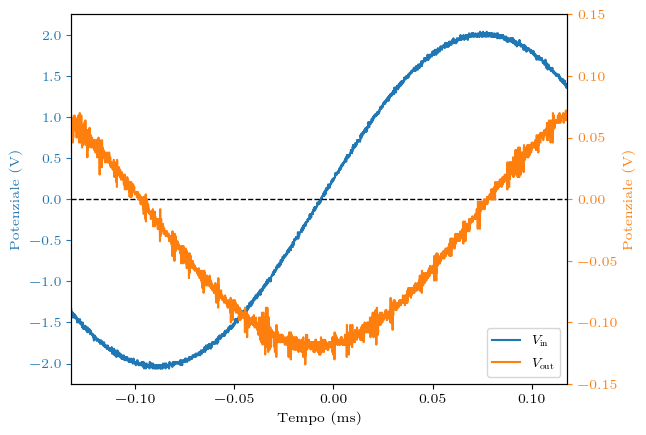

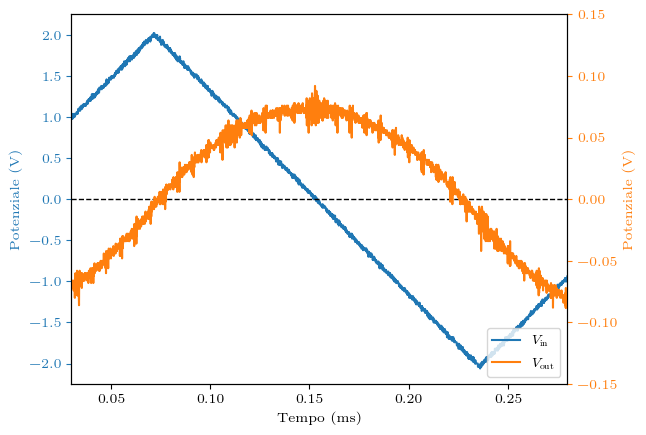

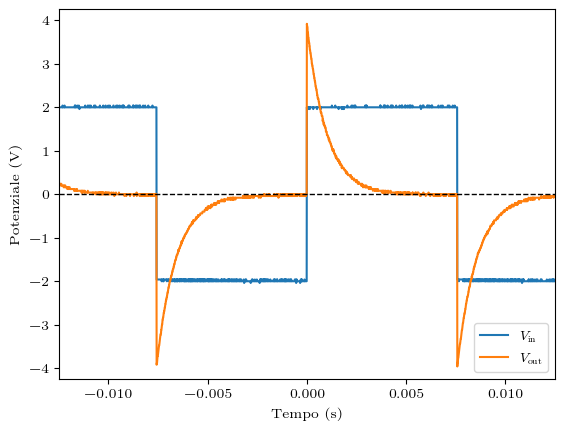

90%: 0.11800000000000001 ± 0.0008944271909999133 ms
50%: 0.6875999999999999 ± 0.000632455532033657 ms
10%: 2.200779661016949 ± 0.0002603778219616258 ms
Tempo di discesa: 2.082779661016949 ± 0.001154805012961539 ms
Tempo caratteristico (dal tempo di discesa): 0.947913873939087 ± 0.0005255744109514531 ms
Tempo caratteristico (dal tempo di dimezzamento): 0.9919971101152513 ± 0.0009124404596477479 ms


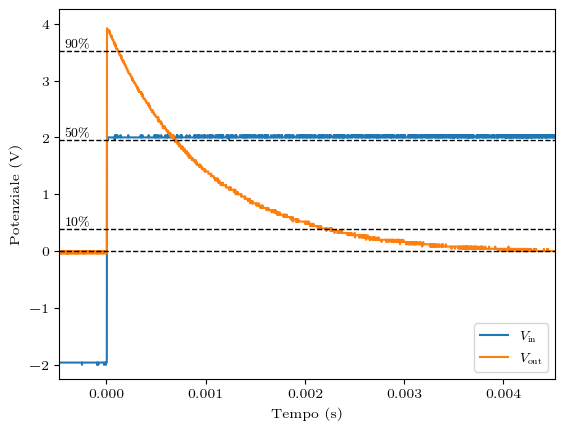

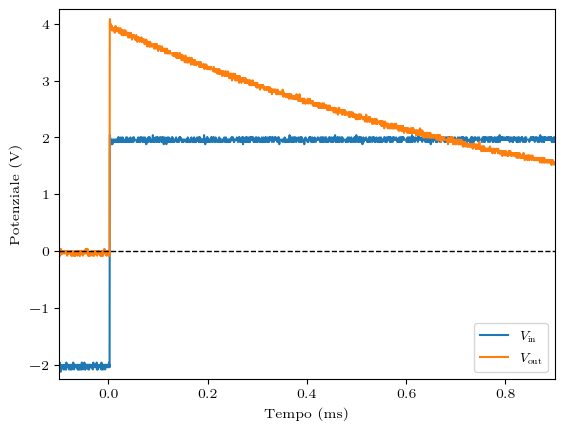

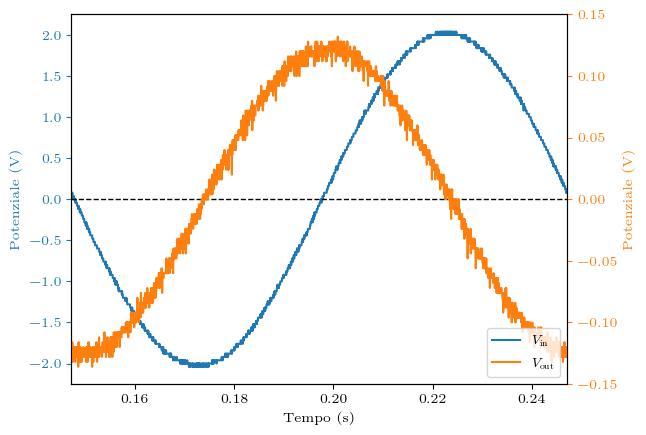

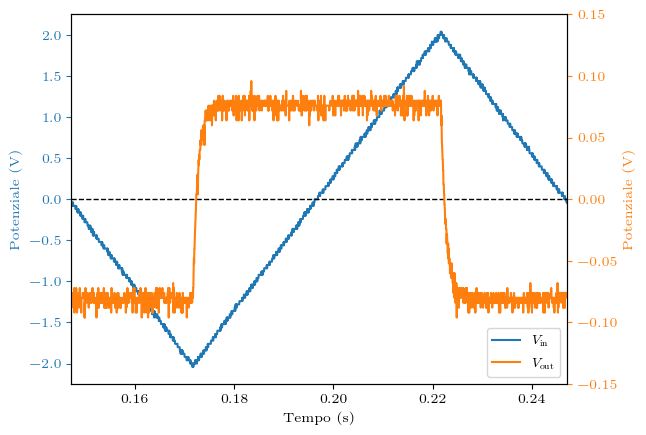

In [ ]:
_AS_MILLISECONDS = {0, 4, 6, 7, 11}
for i, (ch1, ch2) in enumerate(files):
    if i in {3, 5, 8, 12, 13}: continue
    _TIME_SCALE_FACTOR = 1000 if i in _AS_MILLISECONDS else 1
    # extract data & create axis
    ch1 = ch1[[3, 4]]
    ch2 = ch2[[3, 4]]
    fig, ax1 = plt.subplots()
    if i <= 3 or 9 <= i <= 11:
        ax2 = ax1
    else:
        ax2 = ax1.twinx()
    # plot data
    ch1plot, = ax1.plot(ch1[3] * _TIME_SCALE_FACTOR, ch1[4], color="C0", label=r"$V_\text{in}$")
    ch2plot, = ax2.plot(ch2[3] * _TIME_SCALE_FACTOR, ch2[4], color="C1", label=r"$V_\text{out}$")
    # plot 10% & 90%
    if i == 0:
        data_x = ch2[3].to_numpy()
        data_y = ch2[4].to_numpy()
        _min = data_y.min()
        _amplitude: float = data_y.max() - _min
        ax1.axhline(_the01 := _min + _amplitude * 0.1, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.axhline(_the09 := _min + _amplitude * 0.9, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        _the05 = _min + _amplitude / 2
        # ax1.axhline(, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.text(-2+.1, _the01 + .05, r"$10\%$")
        ax1.text(-2+.1, .05, r"$50\%$")
        ax1.text(-2+.1, _the09 + .05, r"$90\%$")
        # _t11, _t12 = ts_where_y_around(ch2, _the01)
        # _t21, _t22 = ts_where_y_around(ch2, _the09)
        # _t_dimezz_1, _t_dimezz_2 = ts_where_y_around(ch2, 0)
        print("10%:", (_t1 := find_x_where_y_equals(data_x, data_y, _the01)) * 1000, "ms")
        print("50%:", (_t_dimezz := find_x_where_y_equals(data_x, data_y, _the05)) * 1000, "ms")
        print("90%:", (_t2 := find_x_where_y_equals(data_x, data_y, _the09)) * 1000, "ms")
        print("Tempo di salita:", (_ts := _t2 - _t1) * 1000, "ms")
        print("Tempo caratteristico (dal tempo di salita):", (_ts / math.log(9)) * 1000, "ms")
        print("Tempo caratteristico (dal tempo di raddoppiamento):", (_t_dimezz / math.log(2)) * 1000, "ms")
    elif i == 10:
        data_x = ch2[3].to_numpy()
        data_y = ch2[4].to_numpy()
        _amplitude: float = data_y.max()
        ax1.axhline(_the01 := _amplitude * 0.1, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.axhline(_the09 := _amplitude * 0.9, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.axhline(_the05 := _amplitude / 2, color="0.0", linestyle="--", linewidth=1, rasterized=True)
        ax1.text(-.000425, _the01 + .05, r"$10\%$")
        ax1.text(-.000425, _the05 + .05, r"$50\%$")
        ax1.text(-.000425, _the09 + .05, r"$90\%$")
        start_x = data_x[data_y.argmax() + 1]
        print("90%:", (_t2 := find_x_where_y_equals(data_x, data_y, _the09, start_x=start_x)) * 1000, "ms")
        print("50%:", (_t_dimezz := find_x_where_y_equals(data_x, data_y, _the05)) * 1000, "ms")
        print("10%:", (_t1 := find_x_where_y_equals(data_x, data_y, _the01, start_x=start_x)) * 1000, "ms")
        print("Tempo di discesa:", (_ts := _t1 - _t2) * 1000, "ms")
        print("Tempo caratteristico (dal tempo di discesa):", (_ts / math.log(9)) * 1000, "ms")
        print("Tempo caratteristico (dal tempo di dimezzamento):", (_t_dimezz / math.log(2)) * 1000, "ms")
    # customize labels
    ax1.set_xlabel(f"Tempo ({'m' if i in _AS_MILLISECONDS else ''}s)")
    if i <= 3 or 9 <= i <= 11:
        ax1.set_ylabel("Potenziale (V)")
        ax1.set_ylim(-4.25 if i == 9 else -2.25, 2.25 if i <= 3 else 4.25, auto=False)
    else:
        # set labels & colors accordingly
        ax1.set_ylabel("Potenziale (V)", color="C0")
        ax2.set_ylabel("Potenziale (V)", color="C1")
        ax1.tick_params(axis="y", colors="C0")
        ax2.tick_params(axis="y", colors="C1")
        # fix scale & ticks
        _Y_LIM_2 = 0.5 if i == 4 else 0.15
        ax1.set_ylim(-2.25, 2.25, auto=False)
        ax2.set_ylim(-_Y_LIM_2, _Y_LIM_2, auto=False)
    ax2.legend(loc="lower right", handles=[ch1plot, ch2plot])
    ax1.set_xlim(
        min(ch1[3].min(), ch2[3].min()) * _TIME_SCALE_FACTOR,
        max(ch1[3].max(), ch2[3].max()) * _TIME_SCALE_FACTOR
    )
    ax1.axhline(0, color="0.0", linestyle="--", linewidth=1, rasterized=True)
    # show the plot & save it to disk
    plt.show()
    fig.tight_layout()
    fig.savefig(f"img/{i}.png", dpi=300)

Vin = 1.9844525993883795 ± 0.0004946193668294979
m = (2.086279380288275 ± 0.008481141154162408) V/ms
tau = (0.9511921644521909 ± 0.004103867611968033) ms


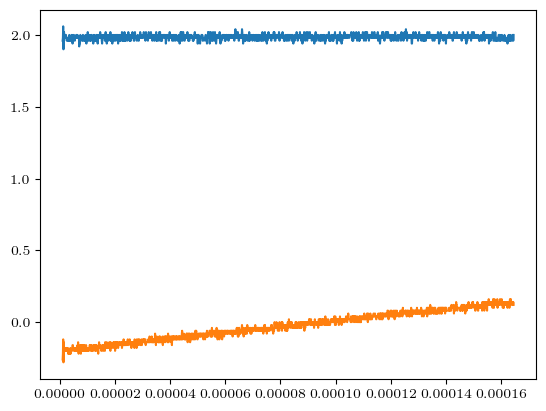

In [5]:
(ch1, ch2) = files[4]
ch1 = ch1[[3, 4]]
ch2 = ch2[[3, 4]]

data_range = slice(ch1.idxmax()[4] + 3, ch1.idxmin()[4] - 3)
dch1 = ch1[data_range]
dch2 = ch2[data_range]
plt.plot(dch1[3], dch1[4])
plt.plot(dch2[3], dch2[4])

Vin = d(float(np.average(dch1[4])), 0.02 * float(len(dch1[4])) ** -.5)
print("Vin =", Vin)

poly2cf, cov2 = np.polyfit(x=dch2[3], y=dch2[4], deg=1, cov=True)
poly2err = np.sqrt(np.diag(cov2))
[m2, q2] = [d(float(c), float(e)) for (c, e) in zip(poly2cf, poly2err)]
print(f"m = ({m2 / 1000}) V/ms")
tau = Vin/m2
print(f"tau = ({tau * 1000}) ms")

Vout = (0.07631286795626577 ± 0.0005800147905657416) V
m = (81.16248104869291 ± 0.03428423628716231) V/s
tau = (0.9402480921015999 ± 0.007543516048463213) ms


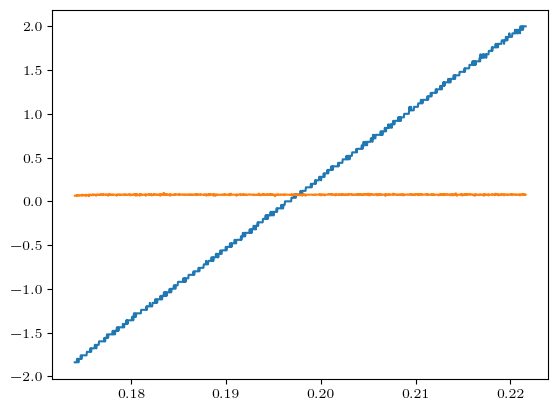

In [6]:
(ch1, ch2) = files[15]
ch1 = ch1[[3, 4]]
ch2 = ch2[[3, 4]]

data_range = slice(ch1.idxmin()[4] + 62, ch1.idxmax()[4])
dch1 = ch1[data_range]
dch2 = ch2[data_range]
plt.plot(dch1[3], dch1[4])
plt.plot(dch2[3], dch2[4])

Vout = d(float(np.average(dch2[4])), 0.02 * float(len(dch2[4])) ** -.5)
print(f"Vout = ({Vout}) V")

poly1cf, cov1 = np.polyfit(x=dch1[3], y=dch1[4], deg=1, cov=True)
poly1err = np.sqrt(np.diag(cov1))
[m1, q1] = [d(float(c), float(e)) for (c, e) in zip(poly1cf, poly1err)]
print(f"m = ({m1}) V/s")
tau = Vout/m1
print(f"tau = ({tau * 1000}) ms")

In [7]:
R = d(10.000, 0.001) * 1000  # Ω
C = d(98.6, 0.1) * 1e-9  # F
tau_teorico = R * C
print(f"tau = {tau_teorico * 1000} ms")

tau = 0.9859999999999999 ± 0.0010986000000000001 ms
